In [1]:
# ---- Imports ----

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)


In [3]:
# ---- 1. Load Dataset ----

print("Loading dataset...")

df = pd.read_csv("../data/spam.csv", encoding="latin-1")

# Keep only label + message columns
df = df[["v1", "v2"]]
df.columns = ["label", "message"]

print("\nFirst 5 rows:")
display(df.head())

df = df.dropna()


Loading dataset...

First 5 rows:


,label,message
0,ham,Hey! Are we still meeting today for lunch?
1,spam,WINNER!! You have won a $1000 Walmart gift car...
2,ham,Please call me when you reach home.
3,spam,Congratulations! You've been selected for a FR...
4,ham,Don't forget the meeting at 3 PM today.


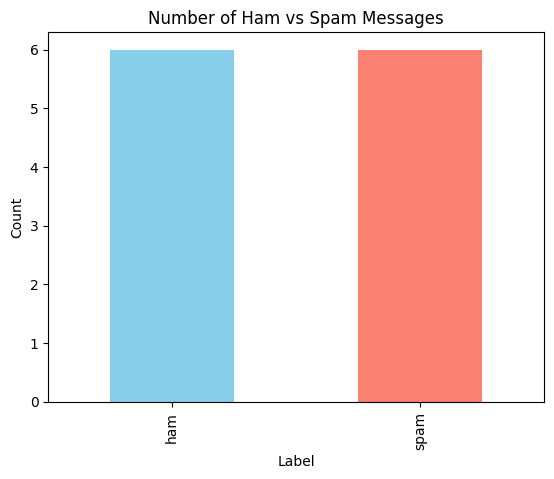

In [4]:
# ---- 2. Class Balance Visualization ----

label_counts = df["label"].value_counts()

plt.figure()
label_counts.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Number of Ham vs Spam Messages")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


In [5]:
# ---- 3. Train/Test Split ----

X = df["message"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", len(X_train))
print("Test samples:", len(X_test))


Training samples: 9
Test samples: 3


In [6]:
# ---- 4. TF-IDF Feature Extraction ----

vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    max_features=3000
)

print("Fitting TF-IDF vectorizer...")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


Fitting TF-IDF vectorizer...


In [7]:
# ---- 5. Train Naive Bayes Model ----

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

print("Model trained successfully.")


Model trained successfully.


In [8]:
# ---- 6. Evaluate Model ----

y_pred = model.predict(X_test_tfidf)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label="spam")
rec = recall_score(y_test, y_pred, pos_label="spam")
f1 = f1_score(y_test, y_pred, pos_label="spam")

print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1-score  : {f1:.4f}")


Accuracy  : 0.3333
Precision : 0.3333
Recall    : 1.0000
F1-score  : 0.5000


<Figure size 640x480 with 0 Axes>

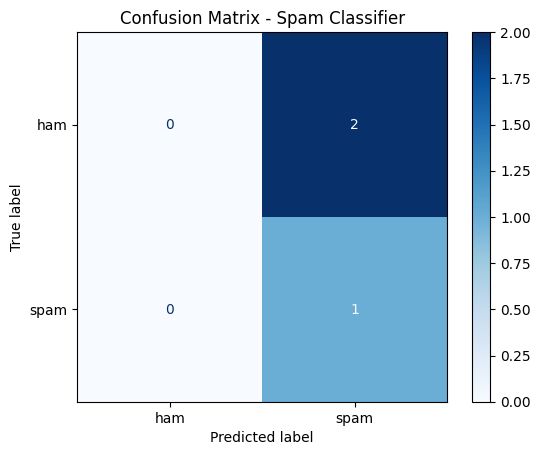

In [9]:
# ---- 7. Confusion Matrix ----

cm = confusion_matrix(y_test, y_pred, labels=["ham", "spam"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["ham", "spam"])
plt.figure()
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Spam Classifier")
plt.show()


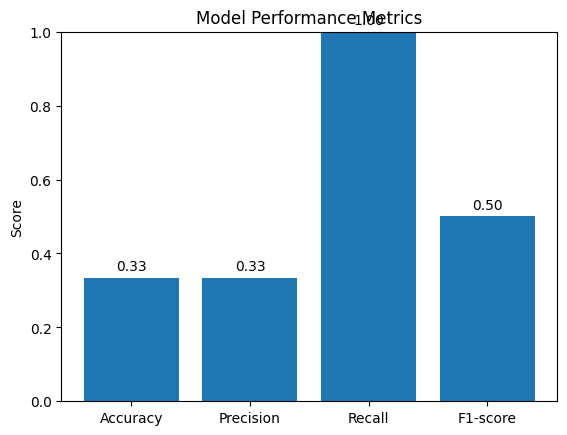

In [10]:
# ---- 8. Model Performance Metrics ----

metrics_names = ["Accuracy", "Precision", "Recall", "F1-score"]
metrics_values = [acc, prec, rec, f1]

plt.figure()
plt.bar(metrics_names, metrics_values)
plt.ylim(0, 1)

for i, v in enumerate(metrics_values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center")

plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.show()


In [11]:
# ---- 9. Predict New Messages ----

def predict_message(text: str) -> str:
    """
    Predict if a given message is spam or ham.
    """
    text_tfidf = vectorizer.transform([text])
    prediction = model.predict(text_tfidf)[0]
    return prediction

print("Prediction function ready.")


Prediction function ready.


In [12]:
# ---- 10. Example Predictions ----

examples = [
    "Congratulations! You have won a $1000 Walmart gift card. Click here to claim now.",
    "Hi bro, are you coming to class tomorrow?",
    "URGENT! Your account has been suspended. Send your password to reactivate.",
    "Dad I reached home safely."
]

for msg in examples:
    print("\nMessage:", msg)
    print("Prediction:", predict_message(msg))



Message: Congratulations! You have won a $1000 Walmart gift card. Click here to claim now.
Prediction: spam

Message: Hi bro, are you coming to class tomorrow?
Prediction: spam

Message: URGENT! Your account has been suspended. Send your password to reactivate.
Prediction: spam

Message: Dad I reached home safely.
Prediction: ham
